# Задачи к Лекции 8

Дана база данных рукописаного текста MNIST (только цифры). Данная база состоит из 70000 объектов, каждый из которых представлен изображением 28x28 пикселей и имеющих метку от 0 до 9.

**Чтение данных**

In [1]:
%matplotlib inline
import zipfile
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml

#ImportError: cannot import name 'fetch_openml'

 #data=wget('https://www.openml.org/d/554')
# Это займет умеренно существенно время, пока данные скачаются
#data = fetch_openml('mnist_784', version=1, return_X_y=True)

пришлось csv-файл из сайта

In [2]:
df = pd.read_csv("/home/aryuna/Downloads/ml/machine_learning/ml_tsu-ml-26-04/lecture8/mnist_784.csv")

In [3]:
df.describe()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
count,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,...,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.0,70000.0,70000.0,70000.0,70000.000000
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.099543,0.046629,0.016614,0.012957,0.001714,0.0,0.0,0.0,0.0,4.452429
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.256304,2.783732,1.561822,1.553796,0.320889,0.0,0.0,0.0,0.0,2.890195
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,2.000000
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,4.000000
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,7.000000
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,253.000000,253.000000,254.000000,62.000000,0.0,0.0,0.0,0.0,9.000000


In [4]:
X=df.iloc[:,0:784]
X.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
y=df['class']
y.head()

0    5
1    0
2    4
3    1
4    9
Name: class, dtype: int64

In [6]:
# немного уменьшим данные (опционально)
X = X[:10000]
y = y[:10000]

**Получение различной информации**

In [7]:
X.shape

(10000, 784)

In [8]:
y.shape

(10000,)

In [9]:
y[0]

5

In [10]:
# преобразуем метки в числа
#list(map(int, y))
Y = list(map(int, y))
Y = np.array(Y)
Y

array([5, 0, 4, ..., 6, 9, 7])

Проверим, что наглая обрезка данных выше не попортила баланс целевых исходов.

In [11]:
np.unique(Y, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([1001, 1127,  991, 1032,  980,  863, 1014, 1070,  944,  978]))

In [12]:
X.iloc[2].head()

pixel1    0
pixel2    0
pixel3    0
pixel4    0
pixel5    0
Name: 2, dtype: int64

In [13]:
Y[2]

4

Убедимся, что это и правда числа

/home/aryuna/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


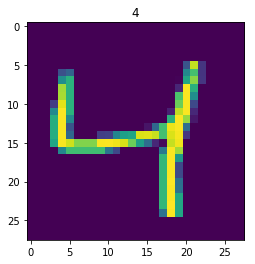

In [14]:
n = 2
kk=X.iloc[n].as_matrix()
plt.imshow(kk.reshape((28, 28)))
plt.title("%d" % Y[n])
plt.show()

Попробуем наивное обучение с помощью kNN

In [15]:
from sklearn.model_selection import train_test_split

In [29]:
train, test, target_train, target_test = train_test_split(X, Y, shuffle=False)

In [30]:
train.shape, test.shape

((7500, 784), (2500, 784))

In [20]:
%%time 

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(3)
# Это будет довольно долго
knn.fit(train, target_train)

CPU times: user 702 ms, sys: 203 µs, total: 702 ms
Wall time: 701 ms


In [21]:
%%time 

# Это будет очень долго
predict = knn.predict(test)

CPU times: user 25.5 s, sys: 3.33 ms, total: 25.5 s
Wall time: 25.5 s


In [22]:
accuracy_score(target_test, predict)

0.9336

**1. Выбрать любой из классификаторов градиентного бустинга, представленного в лекции (SKLearn, XGBoost, LightGBM, CatBoost). Подобрать их гиперпараметры так, чтобы получить наименьшую ошибку доли правильных ответов (accuracy_score). Для этого необходимо самостоятельно изучить соответствующие классификаторы и их гиперпараметры.**

**(Не обязательно) Сделать для любого классификаторов, используя __[логистическую функцию потерь](https://scikit-learn.org/stable/modules/model_evaluation.html#log-loss)__ для многоклассовой задачи.**
$$
L(y, x) = \sum_k [y == f(x)] \ln p(x)
$$

In [25]:
!pip3 install xgboost


In [31]:
# Your code here

import xgboost as xgb

clf = xgb.XGBClassifier(max_depth=3, learning_rate=0.2, n_estimators=1000)

clf.fit(train, target_train)
predict = clf.predict(test)
accuracy_score(target_test, predict)


0.938

In [36]:
#from sklearn import cross_validation  #Additional scklearn functions
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV   #Perforing grid search

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

In [46]:
from xgboost import XGBClassifier

In [45]:
#дерево для классификации
#objective == loss function
# A parameter grid for XGBoost
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }



In [48]:
xgb = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
                    silent=True, nthread=1)

In [51]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold

In [56]:
train, test, target_train, target_test = train_test_split(X, Y, shuffle=False)

In [68]:
target_test

array([2, 3, 4, ..., 6, 9, 7])

In [59]:
%time
folds = 3
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, scoring='accuracy', n_jobs=4, verbose=3, random_state=1001 )

# Here we go
#start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(train, target_train)
#timer(start_time) # timing ends here for "start_time" variable

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.48 µs
Fitting 3 folds for each of 5 candidates, totalling 15 fits


/home/aryuna/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  15 out of  15 | elapsed: 83.7min finished


RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
          estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.02, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=600,
       n_jobs=1, nthread=1, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
          fit_params=None, iid='warn', n_iter=5, n_jobs=4,
          param_distributions={'min_child_weight': [1, 5, 10], 'gamma': [0.5, 1, 1.5, 2, 5], 'subsample': [0.6, 0.8, 1.0], 'colsample_bytree': [0.6, 0.8, 1.0], 'max_depth': [3, 4, 5]},
          pre_dispatch='2*n_jobs', random_state=1001, refit=True,
          return_train_score='warn', scoring='accuracy', verbose=3)

In [60]:


print('\n All results:')
print(random_search.cv_results_)
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(random_search.best_score_ )
print('\n Best hyperparameters:')
print(random_search.best_params_)
results = pd.DataFrame(random_search.cv_results_)
results.to_csv('/home/aryuna/Downloads/ml/machine_learning/ml_tsu-ml-26-04/lecture8/xgb-random-grid-search-results-01.csv', index=False)




 All results:
{'mean_fit_time': array([1070.71748479, 1490.26859808, 1364.46556187, 1068.176615  ,
       1146.77424622]), 'std_fit_time': array([ 1.90533865, 14.29999553, 19.91235375,  1.72577465, 21.49333148]), 'mean_score_time': array([2.53859051, 3.5732739 , 3.76591102, 2.4596053 , 1.83093429]), 'std_score_time': array([0.17429291, 0.07741001, 0.09590063, 0.0081446 , 0.35566182]), 'param_subsample': masked_array(data=[1.0, 0.6, 0.8, 1.0, 0.8],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_min_child_weight': masked_array(data=[5, 1, 5, 5, 1],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_max_depth': masked_array(data=[3, 5, 5, 5, 4],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_gamma': masked_array(data=[5, 1.5, 1, 5, 1],
             mask=[False, False, False, False, False],
       fil

/home/aryuna/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/aryuna/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/aryuna/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/aryuna/anaconda3/lib/pyth

In [69]:
pred = random_search.predict(test)
pred

array([2, 3, 4, ..., 6, 9, 7])

In [70]:
acc=accuracy_score(pred,target_test)

In [71]:
acc

0.932

Все сделано с помошью randomsearch. это позволяет экономить время.